In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
from scipy import linalg
from scipy.interpolate import interp1d

In [2]:
redshift = 0.5 #0.3 #0.5 #0.4 #0.3
model_name = 'redmagic_chi6_1e-02_HBT' #'redmagic_chi2_6e-03_HBT'
rich_name = 'd90'
output_loc = '/cosma8/data/do012/dc-wu5/cylinder/output_L1000N3600/HYDRO_FIDUCIAL/'


In [3]:
## make the data vector for MCMC
for redshift in [0.3, 0.4, 0.5]:
    output_loc += f'z{redshift}/model_{model_name}/' 
    data_loc = output_loc + 'obs_q180_desy1/'
    #rp_rad = np.loadtxt('data_vector_abacus_summit//rp_rad.dat')
    rp_rad, DS, DS_err = np.loadtxt(f'../../hod/y1/data/y1_DS_bin_z_0.2_0.35_lam_0.dat', unpack=True)
    print('len(rp_rad) = ', len(rp_rad))
    
    DS_data = []
    for ibin in range(4):
        rp_in, DS_in = np.loadtxt(data_loc + f'DS_phys_noh_lam_bin_{ibin}.dat', unpack=True)
        DS_interp = interp1d(np.log(rp_in), np.log(DS_in))
        DS_data.extend(np.exp(DS_interp(np.log(rp_rad))))
    DS_data = np.array(DS_data)
    x, x, NC_data = np.loadtxt(data_loc+'abundance.dat',unpack=True)
    data_vec = np.append(NC_data, DS_data)
    np.savetxt(f'data_vector_flamingo/data_vector_z{redshift}.dat', data_vec, comments='NC (4), DS (4x11)')

len(rp_rad) =  11


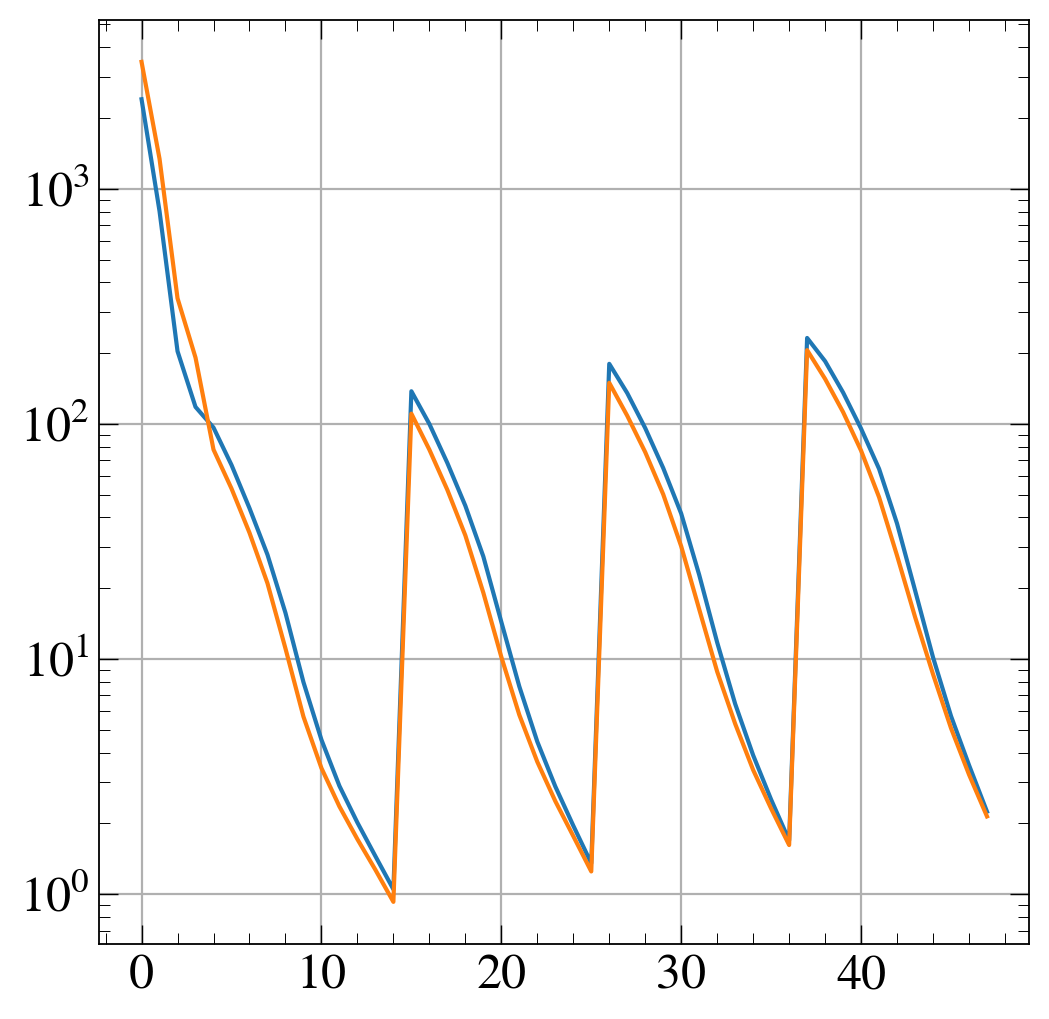

In [4]:
# data_vec_summit = np.loadtxt('data_vector_abacus_summit/data_vector_z0p300.dat')
# plt.plot(data_vec_summit, label='Summit')
# plt.plot(data_vec, label='Flamingo')
# plt.yscale('log')

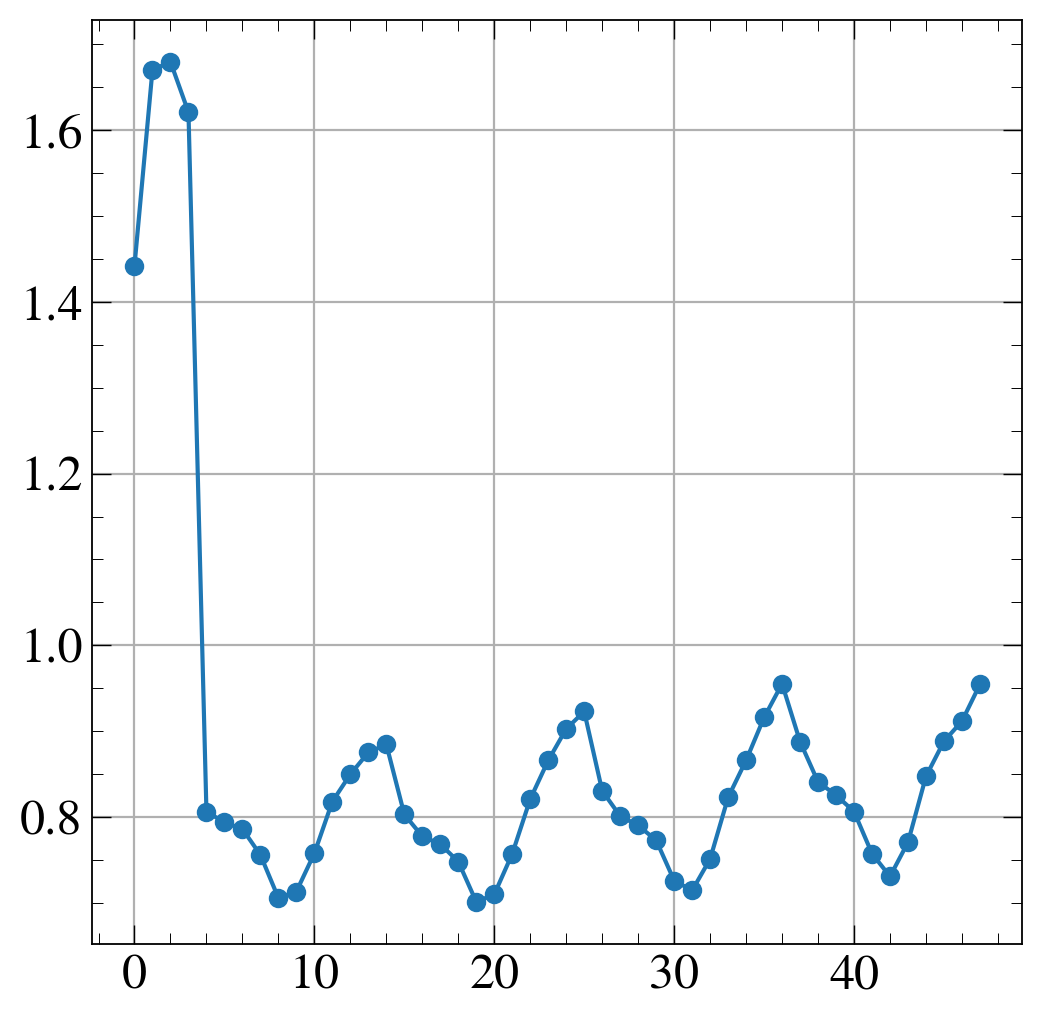

In [5]:
#plt.plot(data_vec/data_vec_summit,'o-', label='Flamingo/Summit')
#plt.yscale('log')

"\ncov_loc = '/users/hywu/work/cluster-lensing-cov-public/examples/abacus_summit_analytic/'\nz = [20, 30, 45, 60, 1000]\n\nfor ibin in range(4):    \n    rp_cov = np.loadtxt(cov_loc + f'rp_phys_noh_0.2_0.35_{z[ibin]}_{z[ibin+1]}.dat')\n    print('check radius difference', '%.2g'%max(abs(rp_cov[4:]/rp_rad - 1)))\n    data = np.loadtxt(cov_loc + f'DeltaSigma_cov_combined_phys_noh_0.2_0.35_{z[ibin]}_{z[ibin+1]}.dat')\n    data = data[4:,4:]\n    if ibin == 0:\n        cov_DS = data * 1.\n    else:\n        cov_DS = linalg.block_diag(cov_DS, data)\nprint('np.shape(cov_DS)', np.shape(cov_DS))\ncov_DS_inv = linalg.inv(cov_DS)\n\n#cov_NC = np.diag(NC_data)\nz = [20, 30, 45, 60, 1000]\ncov_NC = []\nfor ibin in range(4):    \n    counts, sv, bias, lnM_mean = np.loadtxt(cov_loc + f'counts_0.2_0.35_{z[ibin]}_{z[ibin+1]}.dat')\n    cov_NC.append(counts + sv)\ncov_NC = np.diag(cov_NC)\ncov_NC_inv = linalg.inv(cov_NC)\n\nfrom scipy.linalg import block_diag\ncov_inv = block_diag(cov_NC_inv, cov_DS_in